In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load csv files that starts with the argument
def load_csv_by_name(path, name):
    # load csv file that starts with the argument
    # return the element in the path that has name in path
    data = [pd.read_csv(file) for file in path if name in file]
    return data[0]

# get the file path of csv files in data folder
def get_csv_path_reward(env_name):
    path = './data/' + env_name
    files = os.listdir(path)
    csv_files = [os.path.join(path, file) for file in files if file.endswith('.csv')]
    return csv_files

def get_csv_path_hierarchy(env_name):
    path = './data/' + env_name + '_hierarchy_use '
    files = os.listdir(path)
    csv_files = [os.path.join(path, file) for file in files if file.endswith('.csv')]
    return csv_files

def get_data_by_column(data, model_name):
    data['Step']
    column_names = data.keys()

    # list of columns that include model_name
    column_names = [column for column in column_names if model_name in column]

    # list of columns that does not ends with min max
    column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

    data[column_names[0]]

    data
    return 0

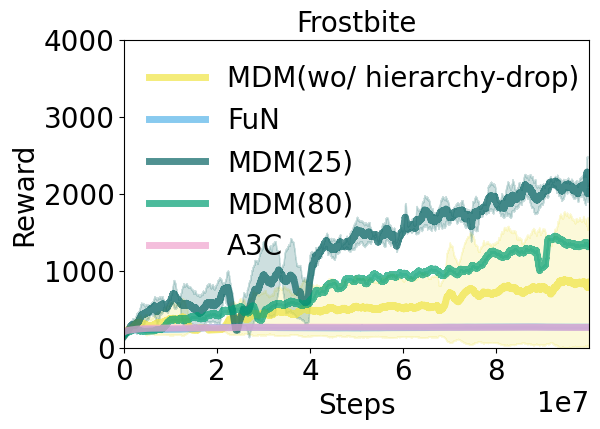

In [41]:
%matplotlib inline

fontsize = 20

plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize


env_name = 'Frostbite'
dilations = ['25', '80']


# subplot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# list of model name
if env_name == 'Frostbite':
    model_names = ['fix', 'FuN','MDM', 'a3c']
    cc = ['#F0E442', '#56B4E9', '#066363', '#F0A3CE']
    cc2 = ['#066363', '#009E73']
else:
    model_names = ['FuN','MDM', 'a3c']
    cc = ['#56B4E9', '#066363', '#F0A3CE']
    cc2 = ['#066363', '#009E73']
for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path_reward(env_name)
    if (model_name == 'FuN') or (model_name == 'a3c') or (model_name == 'fix'):
        if (model_name == 'FuN') or (model_name == 'a3c'):
            data  = load_csv_by_name(csv_files, model_name+'_reward')
        if (model_name == 'fix'):
            data  = load_csv_by_name(csv_files, model_name+'_reward_'+ '25')
        data = data[data['Step'] < 100000000]
        #data.fillna(method='bfill', inplace=True)
        #data = data.fillna(0)

        column_names = data.keys()
        # list of columns that include model_name
        column_names = [column for column in column_names if model_name in column]
        # list of columns that does not ends with min max
        column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

        steps = np.array(data['Step'])
        smoothing_length = 5000
        dataset = []
        for i in range(len(column_names)):
            datapoints = np.array(data[column_names[i]])
            # interpolate nan in datapoints
            datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
            # datapoints smoothing running average
            #datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')
            #datapoints = np.array([np.nanmean(datapoints[idx:idx+smoothing_length]) for idx in range(len(datapoints))])
            data_list = []
            for idx in range(len(datapoints)):
                if (idx <= (len(datapoints)-1000)):
                    data_list.append(np.nanmean(datapoints[idx:idx+smoothing_length]))
                else:
                    data_list.append(np.nanmean(datapoints[idx-smoothing_length:idx]))

            datapoints = np.array(data_list)
            dataset.append(datapoints)
        dataset = np.array(dataset)
        # plot mean of the line and standard deviation
        plt.ylim([0, 3000])
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        p = ax.plot(steps, dataset.mean(axis=0), label=model_names[id], linewidth = 5, c=cc[id],alpha=0.7)
        # plot shades of standard deviation
        ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_', color=cc[id])

    else:    
        for count, dilation in enumerate(dilations):
            data  = load_csv_by_name(csv_files, model_name+'_reward_'+ dilation)
            
            data = data[data['Step'] < 100000000]
            #data.fillna(method='bfill', inplace=True)
            #data = data.fillna(0)

            column_names = data.keys()
            # list of columns that include model_name
            column_names = [column for column in column_names if model_name in column]
            # list of columns that does not ends with min max
            column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

            steps = np.array(data['Step'])
            smoothing_length = 5000
            dataset = []
            for i in range(len(column_names)):
                datapoints = np.array(data[column_names[i]])
                # interpolate nan in datapoints
                datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
                # datapoints smoothing running average
                #datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')
                #datapoints = np.array([np.nanmean(datapoints[idx:idx+smoothing_length]) for idx in range(len(datapoints))])
                data_list = []
                for idx in range(len(datapoints)):
                    if (idx <= (len(datapoints)-1000)):
                        data_list.append(np.nanmean(datapoints[idx:idx+smoothing_length]))
                    else:
                        data_list.append(np.nanmean(datapoints[idx-smoothing_length:idx]))

                datapoints = np.array(data_list)
                dataset.append(datapoints)
            dataset = np.array(dataset)
            # plot mean of the line and standard deviation
            plt.ylim([0, 3000])
            plt.xticks(fontsize=fontsize)
            plt.yticks(fontsize=fontsize)
            p = ax.plot(steps, dataset.mean(axis=0), label=model_names[id], linewidth = 5, c=cc2[count],alpha=0.7)
            # plot shades of standard deviation
            ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_', color=cc2[count])

if env_name == 'Frostbite':
    model_names2 = ['MDM(wo/ hierarchy-drop)', 'FuN', 'MDM(25)','MDM(80)', 'A3C',]
else:
    model_names2 = ['FuN', 'MDM(25)','MDM(80)', 'A3C']
#model_names = ['FuN', 'MDM', 'A3C', 'MDM(wo/ hierarchy-drop)']
ax.set_title("Frostbite", fontsize=fontsize)
ax.set_yticks([0,1000,2000,3000,4000])
ax.set_xticks([0e8, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8])
ax.set_xlabel('Steps', fontsize=fontsize)
ax.set_ylabel('Reward', fontsize=fontsize)
ax.legend(model_names2, loc='upper left', fontsize=fontsize, frameon=False)
#ax.legend()
ax.set_xlim(0, max(steps))

#save figure
fig.savefig('./FROSTBITE.png', dpi=300, bbox_inches='tight')


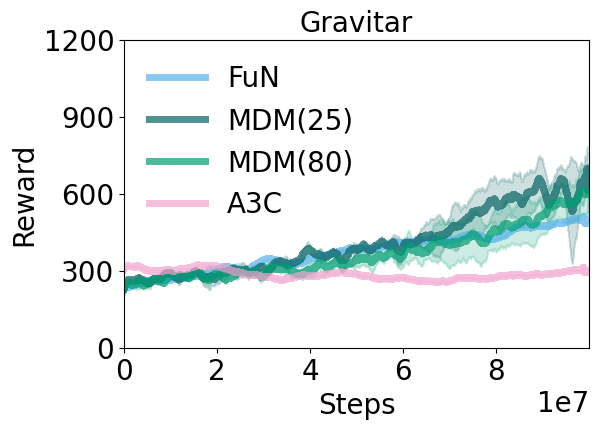

In [42]:
%matplotlib inline

fontsize = 20

plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize


env_name = 'Gravitar'
dilations = ['25', '80']


# subplot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# list of model name
if env_name == 'Frostbite':
    model_names = ['fix', 'FuN','MDM', 'a3c']
    cc = ['#F0E442', '#56B4E9', '#066363', '#F0A3CE']
    cc2 = ['#066363', '#009E73']
else:
    model_names = ['FuN','MDM', 'a3c']
    cc = ['#56B4E9', '#066363', '#F0A3CE']
    cc2 = ['#066363', '#009E73']
for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path_reward(env_name)
    if (model_name == 'FuN') or (model_name == 'a3c') or (model_name == 'fix'):
        if (model_name == 'FuN') or (model_name == 'a3c'):
            data  = load_csv_by_name(csv_files, model_name+'_reward')
        if (model_name == 'fix'):
            data  = load_csv_by_name(csv_files, model_name+'_reward_'+ '25')
        data = data[data['Step'] < 100000000]
        #data.fillna(method='bfill', inplace=True)
        #data = data.fillna(0)

        column_names = data.keys()
        # list of columns that include model_name
        column_names = [column for column in column_names if model_name in column]
        # list of columns that does not ends with min max
        column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

        steps = np.array(data['Step'])
        smoothing_length = 5000
        dataset = []
        for i in range(len(column_names)):
            datapoints = np.array(data[column_names[i]])
            # interpolate nan in datapoints
            datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
            # datapoints smoothing running average
            #datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')
            #datapoints = np.array([np.nanmean(datapoints[idx:idx+smoothing_length]) for idx in range(len(datapoints))])
            data_list = []
            for idx in range(len(datapoints)):
                if (idx <= (len(datapoints)-1000)):
                    data_list.append(np.nanmean(datapoints[idx:idx+smoothing_length]))
                else:
                    data_list.append(np.nanmean(datapoints[idx-smoothing_length:idx]))

            datapoints = np.array(data_list)
            dataset.append(datapoints)
        dataset = np.array(dataset)
        # plot mean of the line and standard deviation
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        p = ax.plot(steps, dataset.mean(axis=0), label=model_names[id], linewidth = 5, c=cc[id],alpha=0.7)
        # plot shades of standard deviation
        ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_', color=cc[id])

    else:    
        for count, dilation in enumerate(dilations):
            data  = load_csv_by_name(csv_files, model_name+'_reward_'+ dilation)
            
            data = data[data['Step'] < 100000000]
            #data.fillna(method='bfill', inplace=True)
            #data = data.fillna(0)

            column_names = data.keys()
            # list of columns that include model_name
            column_names = [column for column in column_names if model_name in column]
            # list of columns that does not ends with min max
            column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

            steps = np.array(data['Step'])
            smoothing_length = 5000
            dataset = []
            for i in range(len(column_names)):
                datapoints = np.array(data[column_names[i]])
                # interpolate nan in datapoints
                datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
                # datapoints smoothing running average
                #datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')
                #datapoints = np.array([np.nanmean(datapoints[idx:idx+smoothing_length]) for idx in range(len(datapoints))])
                data_list = []
                for idx in range(len(datapoints)):
                    if (idx <= (len(datapoints)-1000)):
                        data_list.append(np.nanmean(datapoints[idx:idx+smoothing_length]))
                    else:
                        data_list.append(np.nanmean(datapoints[idx-smoothing_length:idx]))

                datapoints = np.array(data_list)
                dataset.append(datapoints)
            dataset = np.array(dataset)
            # plot mean of the line and standard deviation
            plt.xticks(fontsize=fontsize)
            plt.yticks(fontsize=fontsize)
            p = ax.plot(steps, dataset.mean(axis=0), label=model_names[id], linewidth = 5, c=cc2[count],alpha=0.7)
            # plot shades of standard deviation
            ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_', color=cc2[count])

if env_name == 'Frostbite':
    model_names2 = ['MDM(wo/ hierarchy-drop)', 'FuN', 'MDM(25)','MDM(80)', 'A3C',]
else:
    model_names2 = ['FuN', 'MDM(25)','MDM(80)', 'A3C']
#model_names = ['FuN', 'MDM', 'A3C', 'MDM(wo/ hierarchy-drop)']
ax.set_title(env_name, fontsize=fontsize)
ax.set_yticks([0,300,600,900,1200])
ax.set_ylim(0,1200)
ax.set_xticks([0e8, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8])
ax.set_xlabel('Steps', fontsize=fontsize)
ax.set_ylabel('Reward', fontsize=fontsize)
ax.legend(model_names2, loc='upper left', fontsize=fontsize, frameon=False)
#ax.legend()
ax.set_xlim(0, max(steps))

#save figure
fig.savefig('./Gravitar.png', dpi=300, bbox_inches='tight')


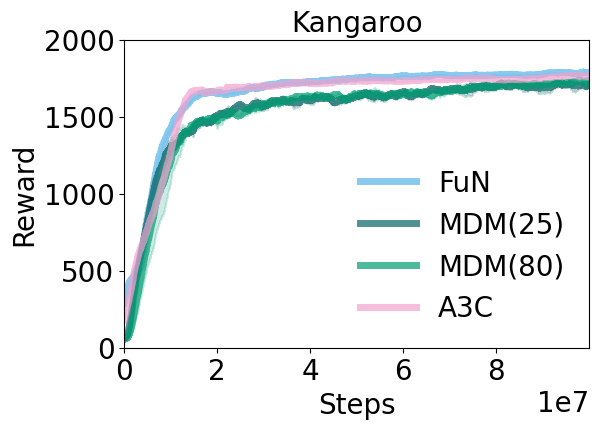

In [43]:
%matplotlib inline

fontsize = 20

plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize


env_name = 'Kangaroo'
dilations = ['25', '80']


# subplot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# list of model name
if env_name == 'Frostbite':
    model_names = ['fix', 'FuN','MDM', 'a3c']
    cc = ['#F0E442', '#56B4E9', '#066363', '#F0A3CE']
    cc2 = ['#066363', '#009E73']
else:
    model_names = ['FuN','MDM', 'a3c']
    cc = ['#56B4E9', '#066363', '#F0A3CE']
    cc2 = ['#066363', '#009E73']
for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path_reward(env_name)
    if (model_name == 'FuN') or (model_name == 'a3c') or (model_name == 'fix'):
        if (model_name == 'FuN') or (model_name == 'a3c'):
            data  = load_csv_by_name(csv_files, model_name+'_reward')
        if (model_name == 'fix'):
            data  = load_csv_by_name(csv_files, model_name+'_reward_'+ '25')
        data = data[data['Step'] < 100000000]
        #data.fillna(method='bfill', inplace=True)
        #data = data.fillna(0)

        column_names = data.keys()
        # list of columns that include model_name
        column_names = [column for column in column_names if model_name in column]
        # list of columns that does not ends with min max
        column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

        steps = np.array(data['Step'])
        smoothing_length = 5000
        dataset = []
        for i in range(len(column_names)):
            datapoints = np.array(data[column_names[i]])
            # interpolate nan in datapoints
            datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
            # datapoints smoothing running average
            #datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')
            #datapoints = np.array([np.nanmean(datapoints[idx:idx+smoothing_length]) for idx in range(len(datapoints))])
            data_list = []
            for idx in range(len(datapoints)):
                if (idx <= (len(datapoints)-1000)):
                    data_list.append(np.nanmean(datapoints[idx:idx+smoothing_length]))
                else:
                    data_list.append(np.nanmean(datapoints[idx-smoothing_length:idx]))

            datapoints = np.array(data_list)
            dataset.append(datapoints)
        dataset = np.array(dataset)
        # plot mean of the line and standard deviation
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        p = ax.plot(steps, dataset.mean(axis=0), label=model_names[id], linewidth = 5, c=cc[id],alpha=0.7)
        # plot shades of standard deviation
        ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_', color=cc[id])

    else:    
        for count, dilation in enumerate(dilations):
            data  = load_csv_by_name(csv_files, model_name+'_reward_'+ dilation)
            
            data = data[data['Step'] < 100000000]
            #data.fillna(method='bfill', inplace=True)
            #data = data.fillna(0)

            column_names = data.keys()
            # list of columns that include model_name
            column_names = [column for column in column_names if model_name in column]
            # list of columns that does not ends with min max
            column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

            steps = np.array(data['Step'])
            smoothing_length = 5000
            dataset = []
            for i in range(len(column_names)):
                datapoints = np.array(data[column_names[i]])
                # interpolate nan in datapoints
                datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
                # datapoints smoothing running average
                #datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')
                #datapoints = np.array([np.nanmean(datapoints[idx:idx+smoothing_length]) for idx in range(len(datapoints))])
                data_list = []
                for idx in range(len(datapoints)):
                    if (idx <= (len(datapoints)-1000)):
                        data_list.append(np.nanmean(datapoints[idx:idx+smoothing_length]))
                    else:
                        data_list.append(np.nanmean(datapoints[idx-smoothing_length:idx]))

                datapoints = np.array(data_list)
                dataset.append(datapoints)
            dataset = np.array(dataset)
            # plot mean of the line and standard deviation
            plt.xticks(fontsize=fontsize)
            plt.yticks(fontsize=fontsize)
            p = ax.plot(steps, dataset.mean(axis=0), label=model_names[id], linewidth = 5, c=cc2[count],alpha=0.7)
            # plot shades of standard deviation
            ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_', color=cc2[count])

if env_name == 'Frostbite':
    model_names2 = ['MDM(wo/ hierarchy-drop)', 'FuN', 'MDM(25)','MDM(80)', 'A3C',]
else:
    model_names2 = ['FuN', 'MDM(25)','MDM(80)', 'A3C']
#model_names = ['FuN', 'MDM', 'A3C', 'MDM(wo/ hierarchy-drop)']
ax.set_title(env_name, fontsize=fontsize)
ax.set_yticks([0,500,1000,1500,2000])
ax.set_ylim(0,2000)
# ax.set_yticks([0,400,800,1200,1600])
# ax.set_ylim(0,2000)
ax.set_xticks([0e8, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8])
ax.set_xlabel('Steps', fontsize=fontsize)
ax.set_ylabel('Reward', fontsize=fontsize)
ax.legend(model_names2, loc='lower right', fontsize=fontsize, frameon=False)
#ax.legend()
ax.set_xlim(0, max(steps))

#save figure
fig.savefig('./Kangaroo.png', dpi=300, bbox_inches='tight')


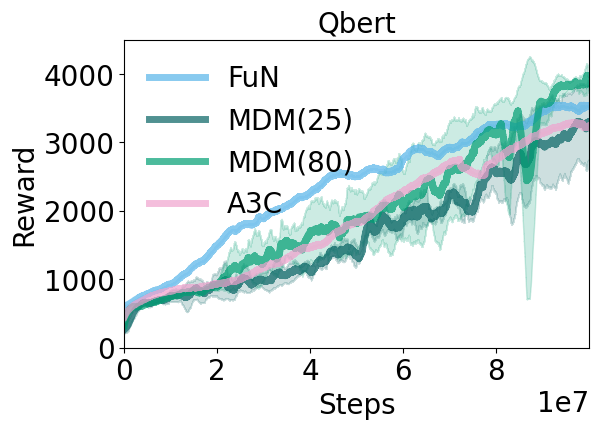

In [44]:
%matplotlib inline

fontsize = 20

plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize


env_name = 'Qbert'
dilations = ['25', '80']


# subplot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# list of model name
if env_name == 'Frostbite':
    model_names = ['fix', 'FuN','MDM', 'a3c']
    cc = ['#F0E442', '#56B4E9', '#066363', '#F0A3CE']
    cc2 = ['#066363', '#009E73']
else:
    model_names = ['FuN','MDM', 'a3c']
    cc = ['#56B4E9', '#066363', '#F0A3CE']
    cc2 = ['#066363', '#009E73']
for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path_reward(env_name)
    if (model_name == 'FuN') or (model_name == 'a3c') or (model_name == 'fix'):
        if (model_name == 'FuN') or (model_name == 'a3c'):
            data  = load_csv_by_name(csv_files, model_name+'_reward')
        if (model_name == 'fix'):
            data  = load_csv_by_name(csv_files, model_name+'_reward_'+ '25')
        data = data[data['Step'] < 100000000]
        #data.fillna(method='bfill', inplace=True)
        #data = data.fillna(0)

        column_names = data.keys()
        # list of columns that include model_name
        column_names = [column for column in column_names if model_name in column]
        # list of columns that does not ends with min max
        column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

        steps = np.array(data['Step'])
        smoothing_length = 5000
        dataset = []
        for i in range(len(column_names)):
            datapoints = np.array(data[column_names[i]])
            # interpolate nan in datapoints
            datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
            # datapoints smoothing running average
            #datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')
            #datapoints = np.array([np.nanmean(datapoints[idx:idx+smoothing_length]) for idx in range(len(datapoints))])
            data_list = []
            for idx in range(len(datapoints)):
                if (idx <= (len(datapoints)-1000)):
                    data_list.append(np.nanmean(datapoints[idx:idx+smoothing_length]))
                else:
                    data_list.append(np.nanmean(datapoints[idx-smoothing_length:idx]))

            datapoints = np.array(data_list)
            dataset.append(datapoints)
        dataset = np.array(dataset)
        # plot mean of the line and standard deviation
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        p = ax.plot(steps, dataset.mean(axis=0), label=model_names[id], linewidth = 5, c=cc[id],alpha=0.7)
        # plot shades of standard deviation
        ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_', color=cc[id])

    else:    
        for count, dilation in enumerate(dilations):
            data  = load_csv_by_name(csv_files, model_name+'_reward_'+ dilation)
            
            data = data[data['Step'] < 100000000]
            #data.fillna(method='bfill', inplace=True)
            #data = data.fillna(0)

            column_names = data.keys()
            # list of columns that include model_name
            column_names = [column for column in column_names if model_name in column]
            # list of columns that does not ends with min max
            column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

            steps = np.array(data['Step'])
            smoothing_length = 5000
            dataset = []
            for i in range(len(column_names)):
                datapoints = np.array(data[column_names[i]])
                # interpolate nan in datapoints
                datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
                # datapoints smoothing running average
                #datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')
                #datapoints = np.array([np.nanmean(datapoints[idx:idx+smoothing_length]) for idx in range(len(datapoints))])
                data_list = []
                for idx in range(len(datapoints)):
                    if (idx <= (len(datapoints)-1000)):
                        data_list.append(np.nanmean(datapoints[idx:idx+smoothing_length]))
                    else:
                        data_list.append(np.nanmean(datapoints[idx-smoothing_length:idx]))

                datapoints = np.array(data_list)
                dataset.append(datapoints)
            dataset = np.array(dataset)
            # plot mean of the line and standard deviation
            plt.xticks(fontsize=fontsize)
            plt.yticks(fontsize=fontsize)
            p = ax.plot(steps, dataset.mean(axis=0), label=model_names[id], linewidth = 5, c=cc2[count],alpha=0.7)
            # plot shades of standard deviation
            ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_', color=cc2[count])

if env_name == 'Frostbite':
    model_names2 = ['MDM(wo/ hierarchy-drop)', 'FuN', 'MDM(25)','MDM(80)', 'A3C',]
else:
    model_names2 = ['FuN', 'MDM(25)','MDM(80)', 'A3C']
#model_names = ['FuN', 'MDM', 'A3C', 'MDM(wo/ hierarchy-drop)']
ax.set_title(env_name, fontsize=fontsize)
ax.set_yticks([0,1000,2000,3000,4000])
ax.set_ylim(0,4500)
# ax.set_yticks([0,400,800,1200,1600])
# ax.set_ylim(0,2000)
ax.set_xticks([0e8, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8])
ax.set_xlabel('Steps', fontsize=fontsize)
ax.set_ylabel('Reward', fontsize=fontsize)
ax.legend(model_names2, loc='upper left', fontsize=fontsize, frameon=False)
#ax.legend()
ax.set_xlim(0, max(steps))

#save figure
fig.savefig('./Qbert.png', dpi=300, bbox_inches='tight')


In [149]:
def get_csv_path_hierarchy(env_name):
    path = './data/' + env_name + '_hierarchy_use'
    files = os.listdir(path)
    csv_files = [os.path.join(path, file) for file in files if file.endswith('.csv')]
    return csv_files

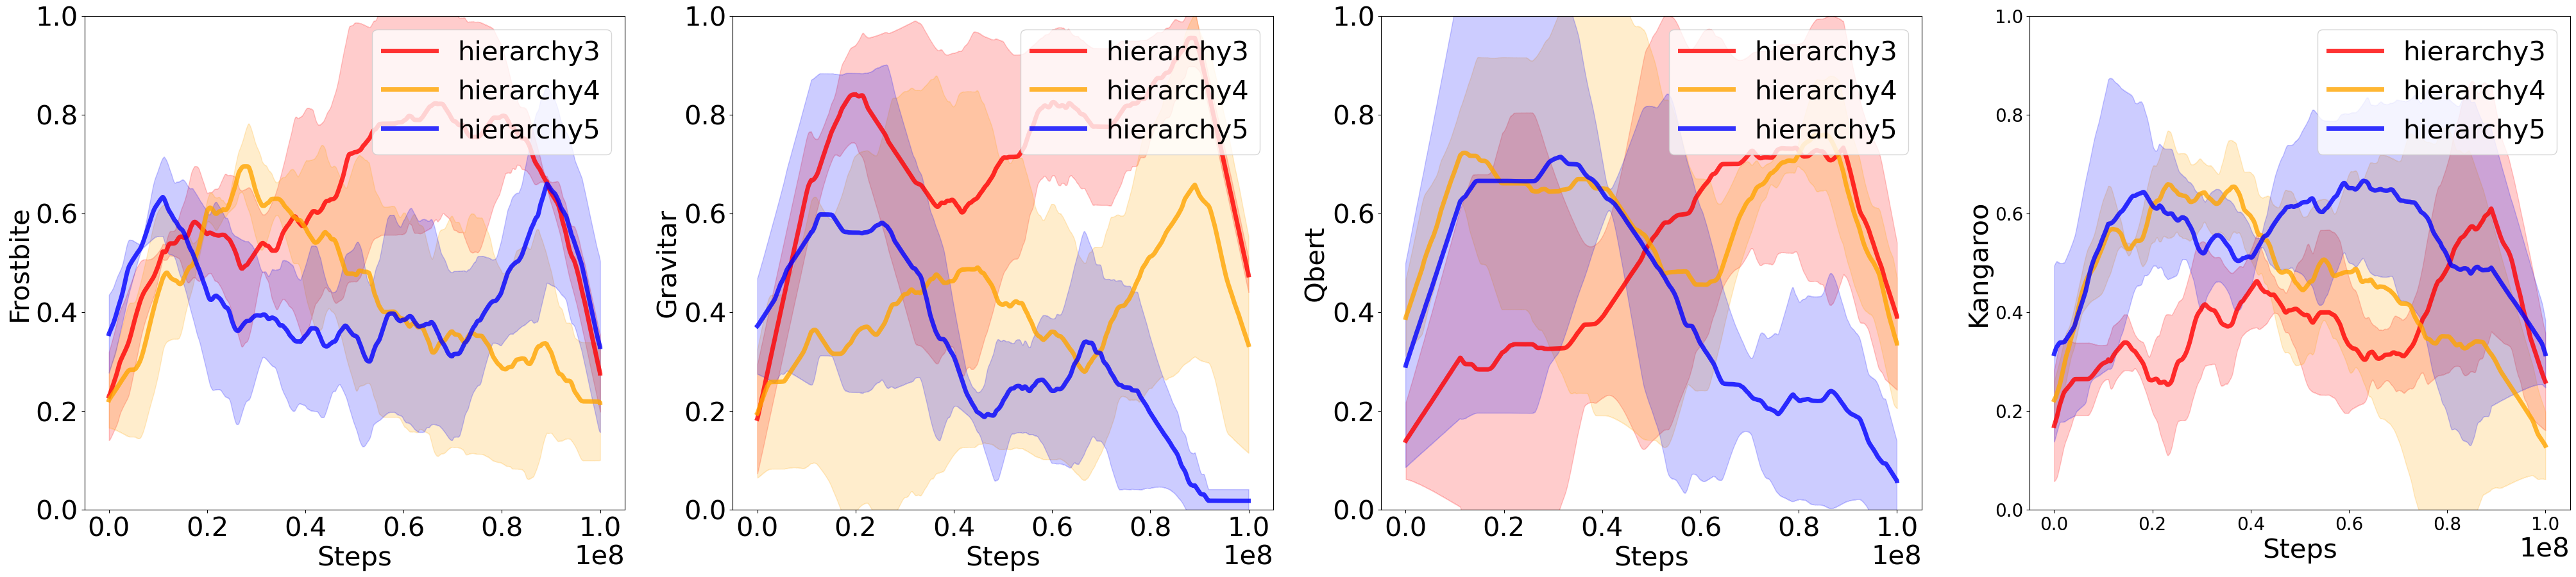

In [180]:
%matplotlib inline

feature_names = ['3', '4', '5']
env_names = ['Frostbite', 'Gravitar', 'Qbert', 'Kangaroo']
dilations = ['25', '25', '80', '25']
# subplot
fig, ax = plt.subplots(1, 4, figsize=(50, 10))
# list of model name
model_names = ['hierarchy3', 'hierarchy4', 'hierarchy5']
color = ['red', 'orange', 'blue',]
num = 0
for id in range(len(env_names)):
    for j in range(len(model_names)):
        dilation = dilations[id]
        env_name = env_names[id]
        model_name = model_names[j]
        feature_name = feature_names[j]
        # get the data using get_csv_path
        csv_files = get_csv_path_hierarchy(env_name)
        data  = load_csv_by_name(csv_files, model_name + '_' + dilation)
        data = data[data['Step'] < 100000000]
        #data = data.fillna(0)
        
        column_names = data.keys()
        # list of columns that include model_name
        column_names = [column for column in column_names if feature_name in column]
        # list of columns that does not ends with min max
        column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

        steps = np.array(data['Step'])
        smoothing_length = 5000
        dataset = []
        for i in range(len(column_names)):
            datapoints = np.array(data[column_names[i]])
            # interpolate nan in datapoints
            datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
            # datapoints smoothing running average
            datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')

            dataset.append(datapoints)
        dataset = np.array(dataset)
        # plot mean of the line and standard deviation
        #plt.ylim([0, 2000])
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        p = ax[id].plot(steps, dataset.mean(axis=0), label=env_names[id], c = color[j], linewidth = 5, alpha = 0.8)
        #p = ax[num].plot(steps, dataset[1], label=model_names[id], c = color[num], linewidth = 5, alpha = 0.5)
        #p = ax[num].plot(steps, dataset[2], label=model_names[id], c = color[num], linewidth = 5, alpha = 0.2)
        # plot shades of standard deviation
        ax[id].fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), 
                            color = color[j], alpha=0.2, label='_nolegend_')
ax[0].legend(model_names,loc='upper right')
ax[1].legend(model_names,loc='upper right')
ax[2].legend(model_names,loc='upper right')
ax[3].legend(model_names,loc='upper right')
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])
ax[2].set_ylim([0, 1])
ax[3].set_ylim([0, 1])
model_names = ['hierarchy5', 'hierarchy4', 'hierarchy3']
#ax.legend(model_names, loc='upper left', fontsize=20, frameon=False)
#ax.legend()
#ax.set_xlim(0, max(steps)+2000)
ax[0].set_xlabel('Steps')
ax[0].set_ylabel(env_names[0])
ax[1].set_xlabel('Steps')
ax[1].set_ylabel(env_names[1])
ax[2].set_xlabel('Steps')
ax[2].set_ylabel(env_names[2])
ax[3].set_xlabel('Steps')
ax[3].set_ylabel(env_names[3])
plt.rcParams.update({'font.size': 30})
plt.savefig('hierarchy_proportion.png', dpi=300, bbox_inches='tight')

In [164]:
column_names

['MDM_Kangaroo_25_3 - hierarchy_use/hierarchy_selected_3',
 'MDM_Kangaroo_25_2 - hierarchy_use/hierarchy_selected_3',
 'MDM_Kangaroo_25_1 - hierarchy_use/hierarchy_selected_3']

(0.0, 49999688.0)

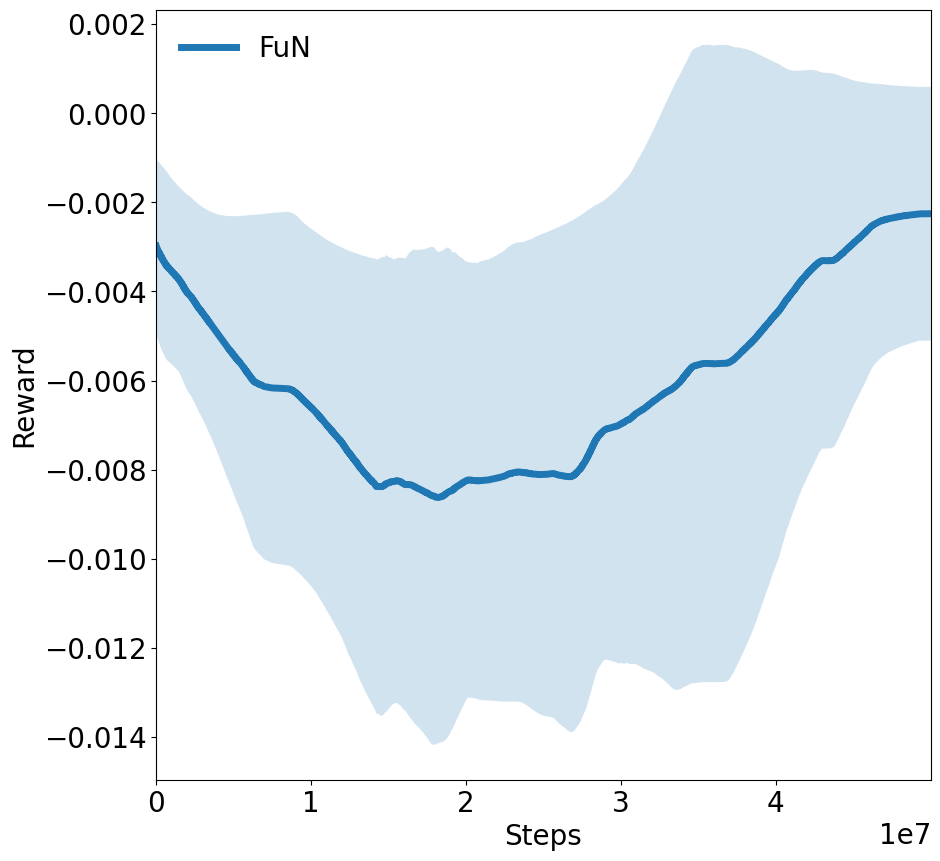

In [254]:
%matplotlib inline


# subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# list of model name
model_names = ['cos']
for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path_hierarchy()
    data  = load_csv_by_name(csv_files, model_name)
    data = data[data['Step'] < 50000000]
    #data = data.fillna(0)
    
    column_names = data.keys()
    # list of columns that include model_name
    column_names = [column for column in column_names if model_name in column]
    # list of columns that does not ends with min max
    column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

    steps = np.array(data['Step'])
    smoothing_length = 5000
    dataset = []
    for i in range(len(column_names)):
        datapoints = np.array(data[column_names[i]])
        # interpolate nan in datapoints
        datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
        # datapoints smoothing running average
        datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')

        dataset.append(datapoints)
    dataset = np.array(dataset)
    # plot mean of the line and standard deviation
    #plt.ylim([0, 2000])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    p = ax.plot(steps, dataset.mean(axis=0), label=model_names[id], linewidth = 5)
    # plot shades of standard deviation
    ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_')

model_names = ['FuN', 'MDM', 'MDM(wo/ hierarchy-drop)']
ax.set_xlabel('Steps')
ax.set_ylabel('Reward')
ax.legend(model_names, loc='upper left', fontsize=20, frameon=False)
#ax.legend()
ax.set_xlim(0, max(steps)+1000)

(0.0, 50000688.0)

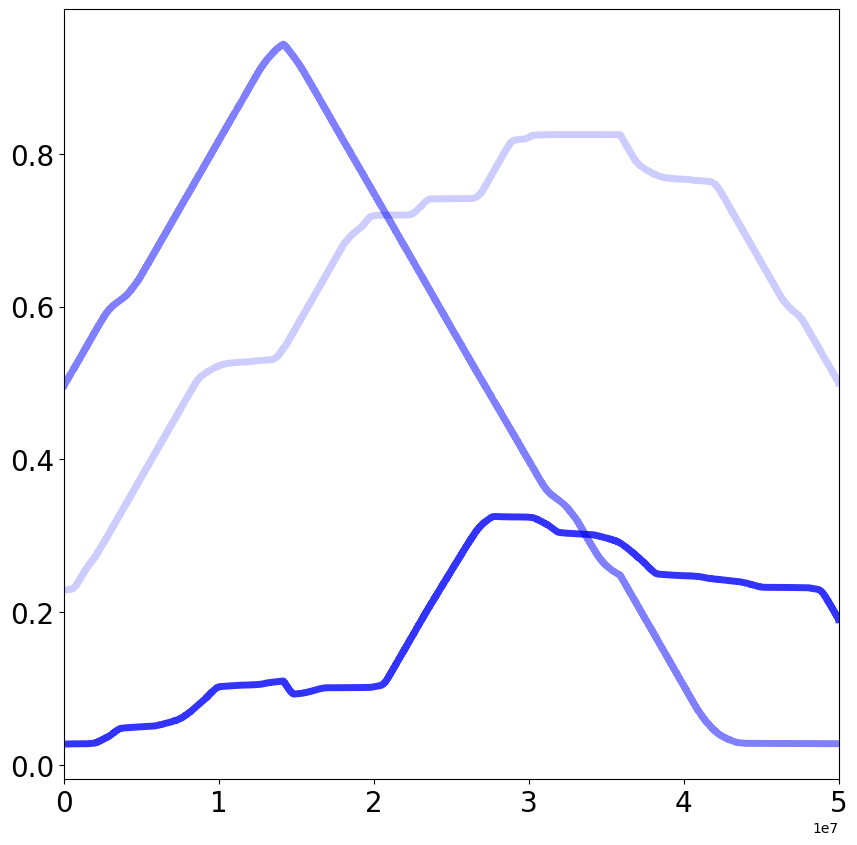

In [238]:
%matplotlib inline


# subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# list of model name
model_names = ['3']
for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path_hierarchy()
    data  = load_csv_by_name(csv_files, model_name)
    data = data[data['Step'] < 50000000]
    #data = data.fillna(0)
    
    column_names = data.keys()
    # list of columns that include model_name
    column_names = [column for column in column_names if model_name in column]
    # list of columns that does not ends with min max
    column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

    steps = np.array(data['Step'])
    smoothing_length = 5000
    dataset = []
    for i in range(len(column_names)):
        datapoints = np.array(data[column_names[i]])
        # interpolate nan in datapoints
        datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
        # datapoints smoothing running average
        datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')

        dataset.append(datapoints)
    dataset = np.array(dataset)
    # plot mean of the line and standard deviation
    #plt.ylim([0, 2000])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    p = ax.plot(steps, dataset[0], label=model_names[id], c = 'b', linewidth = 5, alpha = 0.8)
    p = ax.plot(steps, dataset[1], label=model_names[id], c = 'b', linewidth = 5, alpha = 0.5)
    p = ax.plot(steps, dataset[2], label=model_names[id], c = 'b', linewidth = 5, alpha = 0.2)
    # plot shades of standard deviation
    #ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_')

model_names = ['hierarchy3']
#ax.legend(model_names, loc='upper left', fontsize=20, frameon=False)
#ax.legend()
ax.set_xlim(0, max(steps)+2000)